In [4]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
from qiskit.quantum_info import Statevector
from qiskit import *
# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documen

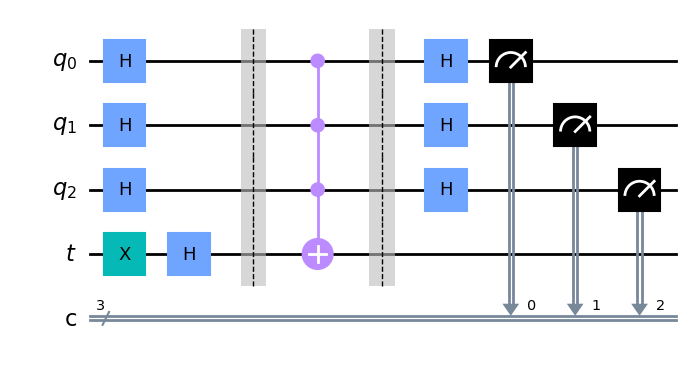

In [11]:
%matplotlib inline

n=3

q = QuantumRegister(n,'q')
t = QuantumRegister(1,'t')
c = ClassicalRegister(n,'c')
qc_dj = QuantumCircuit(q,t,c)


#qc_dj.draw(output='mpl')



#init
qc_dj.x(t)
for i in range(n):
    qc_dj.h(q[i])
qc_dj.h(t)

qc_dj.barrier()
# Oracle f(x) = x1x2X3
#qc_dj.cx(q[0],t)
# t is not ZERO, it is |->
qc_dj.mct([0,1,2],t)

qc_dj.barrier()
for i in range(n):
    qc_dj.h(q[i])
#qc_dj.h(t)

qc_dj.measure(q,c)
qc_dj.draw(output='mpl')



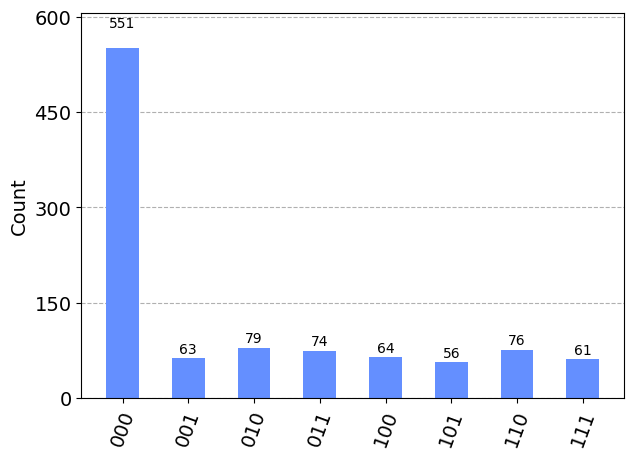

In [12]:
dj_simulator = Aer.get_backend('qasm_simulator')
result = execute(qc_dj,backend=dj_simulator).result()
plot_histogram(result.get_counts(qc_dj))

# 1. HOW to tackle this problem, where the function is not a constant or balanced function ( any fn not necessarilty liner)? 